# Modelos de Regresión Lineal
## Modelos con datos simulados
* y = a + b * x
* X = 100 valores distribuidos según una N (1.5, 2.5)
* Ye = 2 + 0.3 * x + e
* o estara distribuido según una N (0, 0.8)

In [41]:
import pandas as pd
import numpy as np

In [42]:
x = 1.5 + 2.5 + np.random.randn(100)

In [43]:
res = 0 + 0.8 + np.random.randn(100)

In [44]:
y_pred = 5 + 0.3 * x 

In [45]:
y_act = 5 + 0.3 * x + res

In [46]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [47]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actualizado":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [48]:
data.head()

,x,y_actualizado,y_prediccion
0,3.550475,4.725984,6.065142
1,5.210546,6.977740,6.563164
2,4.480070,6.986423,6.344021
3,5.452294,8.382157,6.635688
4,2.827150,6.079703,5.848145


In [49]:
import matplotlib.pyplot as plt

In [50]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

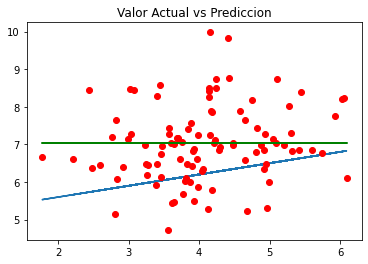

In [51]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor Actual vs Prediccion")

In [52]:
data["SSR"] = (data["y_prediccion"]-np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"]-data["y_actualizado"])**2
data["SST"] = (data["y_actualizado"]-np.mean(y_act))**2

In [53]:
data.head()

,x,y_actualizado,y_prediccion,SSR,SSD,SST
0,3.550475,4.725984,6.065142,0.920996,1.793345,5.284682
1,5.210546,6.977740,6.563164,0.213134,0.171873,0.002217
2,4.480070,6.986423,6.344021,0.463498,0.412680,0.001475
3,5.452294,8.382157,6.635688,0.151430,3.050153,1.842342
4,2.827150,6.079703,5.848145,1.384583,0.053619,0.893261


In [54]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [55]:
SSR

71.1318721153187

In [56]:
SSD

161.8827015442651

In [57]:
SST

99.3037390426033

In [58]:
SSR+SSD

233.0145736595838

In [59]:
R2 = SSR/SST

In [60]:
R2

0.7163060807287599

(array([67., 16.,  4.,  5.,  5.,  1.,  0.,  0.,  1.,  1.]),
 array([2.22980823e-04, 1.39664414e+00, 2.79306530e+00, 4.18948646e+00,
        5.58590763e+00, 6.98232879e+00, 8.37874995e+00, 9.77517111e+00,
        1.11715923e+01, 1.25680134e+01, 1.39644346e+01]),
 <BarContainer object of 10 artists>)

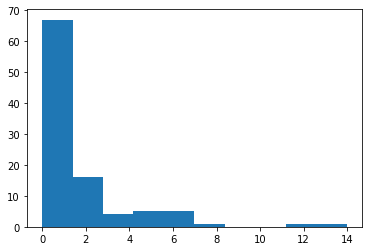

In [61]:
plt.hist(data["SSD"])

(array([ 2.,  1.,  8.,  6., 14., 20., 25., 12.,  8.,  4.]),
 array([-3.73690174, -3.22929575, -2.72168976, -2.21408377, -1.70647779,
        -1.1988718 , -0.69126581, -0.18365982,  0.32394617,  0.83155215,
         1.33915814]),
 <BarContainer object of 10 artists>)

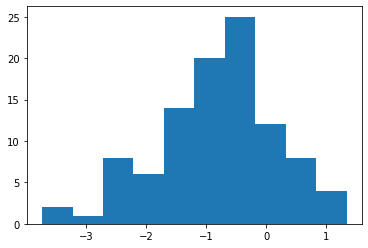

In [62]:
plt.hist(data["y_prediccion"]-data["y_actualizado"])

# Obtención de datos
* y = a + b * x
* b = sum(xi - x_m)*(y_i - y_m)/sum((xi - x_m) ∧ 2)
* a = y_n - b * x_m

In [63]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actualizado"])
x_mean, y_mean

(4.081449818513196, 7.024827893500803)

In [64]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actualizado"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [65]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [66]:
alpha = y_mean - beta * x_mean

In [67]:
alpha, beta

(6.284093444873476, 0.18148806957454267)

El modelo lineal obtenido por regresión es: y = 5.420940927109603 + 1.9874702211324107 * x

In [68]:
data["y_model"] = alpha + beta * data["x"]

In [69]:
data.head()

,x,y_actualizado,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,3.550475,4.725984,6.065142,0.920996,1.793345,5.284682,1.220628,0.281934,6.928462
1,5.210546,6.977740,6.563164,0.213134,0.171873,0.002217,-0.053167,1.274857,7.229745
2,4.480070,6.986423,6.344021,0.463498,0.412680,0.001475,-0.015309,0.158898,7.097173
3,5.452294,8.382157,6.635688,0.151430,3.050153,1.842342,1.860686,1.879213,7.273620
4,2.827150,6.079703,5.848145,1.384583,0.053619,0.893261,1.185470,1.573269,6.797187


In [70]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actualizado"])**2)
SST = sum((data["y_actualizado"]-y_mean)**2)

In [71]:
SSR, SSD, SST

(2.5870850917136026, 96.71665395088966, 99.30373904260333)

In [72]:
R2 = SSR / SST
R2

0.026052242510261274

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

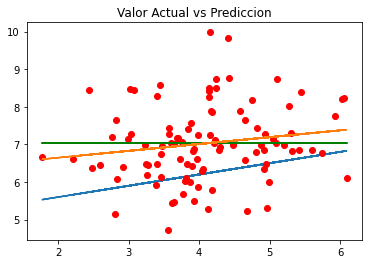

In [73]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"],data["y_actualizado"], "ro")
plt.plot(data["x"], y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Prediccion")

# Error estándar de los residuos (RSE)

In [74]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.9934307384774921

In [76]:
np.mean(data["y_actualizado"])

7.024827893500803

In [77]:
RSE / np.mean(data["y_actualizado"])

0.14141709285099918